# Bonus Activity 4 - Loading and Plotting Argo Float Data
**2020 Data Labs REU**

*Written by Sage Lichtenwalner, Rutgers University, June 9, 2020*

In this notebook we will cover some of basics of loading and plotting [ARGO](https://www.aoml.noaa.gov/phod/argo/) drifter in python.

Becuase this dataset inclues a depth dimension, this allows us to demonstrate several addtional graph types you will commonly see in oceanography, including profiles and TS diagrams.

In [1]:
# Notebook setup
import xarray as xr
!pip install netcdf4

import matplotlib.pyplot as plt

# ARGO Drifter Data
While timeseries datasets at fixed points are very useful, the ocean is a deep place with a lot of interesting features and processes that vary with depth.  

Thus, it's also important to be able to visualize data in ways that emphasize the depth dimension, just as we've emphasized the time dimension above.

To do so, we're going to load data from the [Global Argo Float](http://www.argo.ucsd.edu) program, which had 3,962 active drifters around the world as of 6/6/2020.
![Argo Floats](http://www.argo.ucsd.edu/status.jpg)

Unfortunately, because of the complexity and international nature of the program, there isn't one "perfect" source to retrieve Argo data, or even to search for drifters you may be interested in.  However, I found the following sites helpful.

* [SCCOM Floats](https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccom-float-visualization/) - A great interactive visualization of active floats in the Southern Ocean. You can also create quick plots and download CSV formatted data using [SOCCOMViz](https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccomviz/).
* [Global Argo Data Repository](https://www.ncei.noaa.gov/products/global-argo-data-repository) - A great place to grab drifter data files in netcdf format, once you know what drifter ID you want. (We'll actually use this site below.)
* [Euro Argo Map](https://fleetmonitoring.euro-argo.eu/dashboard) - A relatively new interactive portal to search for drifters and see their recent tracks and data.
* [A beginner's guide to accessing Argo data](http://www.argo.ucsd.edu/Argo_date_guide.html) - More information on the data.
* [Old Euro Argo Site](https://www.euro-argo.eu/Activities/Data-Management/Access-to-data-note-this-website-is-currently-under-revision-and-will-be-updated-in-2020) - May or may not work 

For the purposes of this activity, I picked an active drifter at random. Let's see what #5906017 can tell us about the ocean.

In [2]:
# Let's download a datafile to our serve (see the files tab)
!wget https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc

--2020-06-09 18:42:59--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 140.90.235.40
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|140.90.235.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1167788 (1.1M) [application/x-netcdf]
Saving to: ‘nodc_5906017_prof.nc.2’

nodc_5906017_prof.n 100%[===================>]   1.11M   648KB/s    in 1.8s    

2020-06-09 18:43:02 (648 KB/s) - ‘nodc_5906017_prof.nc.2’ saved [1167788/1167788]



In [3]:
# Load the dataset using xarray
data = xr.open_dataset('nodc_5906017_prof.nc')
data

<xarray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 0, n_levels: 511, n_param: 3, n_prof: 47)
Dimensions without coordinates: n_calib, n_history, n_levels, n_param, n_prof
Data variables:
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    platform_number               (n_prof) object ...
    project_name                  (n_prof) object ...
    pi_name                       (n_prof) object ...
    station_parameters            (n_prof, n_param) object ...
    cycle_number                  (n_prof) float64 ...
    direction                     (n_prof) object ...
    data_centre                   (n_prof) object ...
    dc_reference                  (n_prof) object ...
    data_state_indicator          (n_prof) object ...
    data_mode                     (n_prof) object ...
    platform_type                 (n_prof) object ...
    float_serial_no               (n_prof) object ...
    firmware_version              (n_prof) object ...
    wmo_inst_type                 (n_prof) object ...
    juld                          (n_prof) datetime64[ns] ...
    juld_qc                       (n_prof) object ...
    juld_location                 (n_prof) datetime64[ns] ...
    latitude                      (n_prof) float64 ...
    longitude                     (n_prof) float64 ...
    position_qc                   (n_prof) object ...
    positioning_system            (n_prof) object ...
    profile_pres_qc               (n_prof) object ...
    profile_temp_qc               (n_prof) object ...
    profile_psal_qc               (n_prof) object ...
    vertical_sampling_scheme      (n_prof) object ...
    config_mission_number         (n_prof) float64 ...
    pres                          (n_prof, n_levels) float32 ...
    pres_qc                       (n_prof, n_levels) object ...
    pres_adjusted                 (n_prof, n_levels) float32 ...
    pres_adjusted_qc              (n_prof, n_levels) object ...
    pres_adjusted_error           (n_prof, n_levels) float32 ...
    temp                          (n_prof, n_levels) float32 ...
    temp_qc                       (n_prof, n_levels) object ...
    temp_adjusted                 (n_prof, n_levels) float32 ...
    temp_adjusted_qc              (n_prof, n_levels) object ...
    temp_adjusted_error           (n_prof, n_levels) float32 ...
    psal                          (n_prof, n_levels) float32 ...
    psal_qc                       (n_prof, n_levels) object ...
    psal_adjusted                 (n_prof, n_levels) float32 ...
    psal_adjusted_qc              (n_prof, n_levels) object ...
    psal_adjusted_error           (n_prof, n_levels) float32 ...
    parameter                     (n_prof, n_calib, n_param) object ...
    scientific_calib_equation     (n_prof, n_calib, n_param) object ...
    scientific_calib_coefficient  (n_prof, n_calib, n_param) object ...
    scientific_calib_comment      (n_prof, n_calib, n_param) object ...
    scientific_calib_date         (n_prof, n_calib, n_param) object ...
    history_institution           (n_history, n_prof) object ...
    history_step                  (n_history, n_prof) object ...
    history_software              (n_history, n_prof) object ...
    history_software_release      (n_history, n_prof) object ...
    history_reference             (n_history, n_prof) object ...
    history_date                  (n_history, n_prof) object ...
    history_action                (n_history, n_prof) object ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_hi

As you can see, this dataset is a bit more complicated than our mooring timeseries dataset.  

Argo uses the dimensions n_levels (for depth) and n_prof (for time).

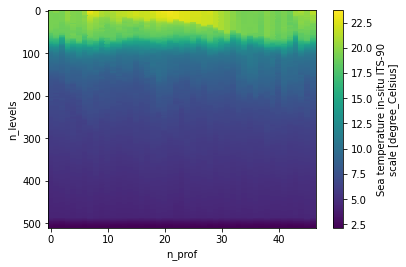

In [4]:
# Quick Timeseries Profile plot of Temperature
data.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

*Note, when possible, you should use the `_adjusted` variables, as those have been corrected.  However, if you are interested in more recent data that hasn't been corrected yet, you will need to use the regular variable names (e.g. temp instead of temp_adjusted).*

## Profile Plot
Now that we have the dataset loaded, let's create a profile plot of a single profile.

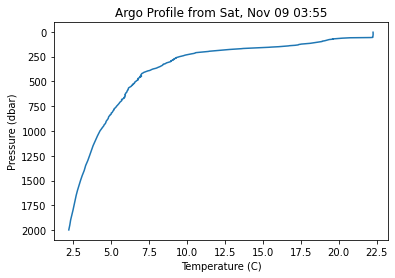

In [5]:
# Profile Plot
nprof = 25 #Specify a profile to plot
plt.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof])

plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.title('Argo Profile from %s' % data.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)

plt.gca().invert_yaxis() #Flip the y-axis

Now let's get a little fancier and plot profiles of 2 variables.

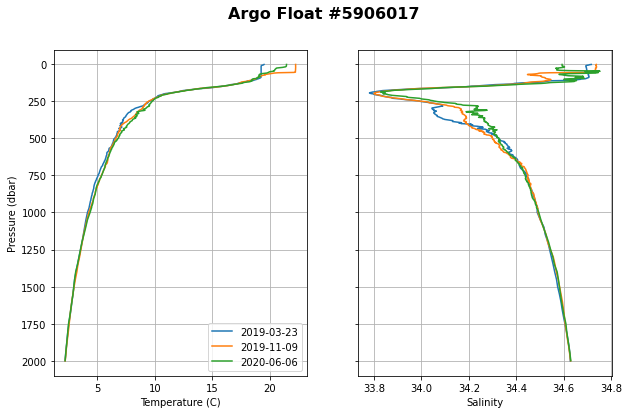

In [6]:
# Profile Plot
# Subplot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # Fist profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = 25 # Middle-ish profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = -1 # Last profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);

### Activity Break
Repeat the steps above to create profile plot of temperature and salinity using Float 5905077.  

Note that this float has a lot of other variables that could be investigated.

In [0]:
# Your Turn - Download the data

In [0]:
# Your Turn - Load the data

In [0]:
# Your Turn - Profile plot

## T-S Diagram
Another popular plot in oceanography is the [T-S Diagram](https://en.wikipedia.org/wiki/Temperature–salinity_diagram), or Temperature-Salinity plot.  It is commonly used to diagnose water masses in the global ocean, and to compare density stability of a water column profile (especially when lines of constant density are also included).

Basically, it's just a scatterplot of temp and salinity.

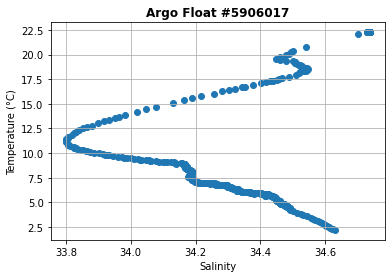

In [10]:
# TS Diagram
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold');

That's nice, but we can also use a colored scatterplot to show the depth dimension.

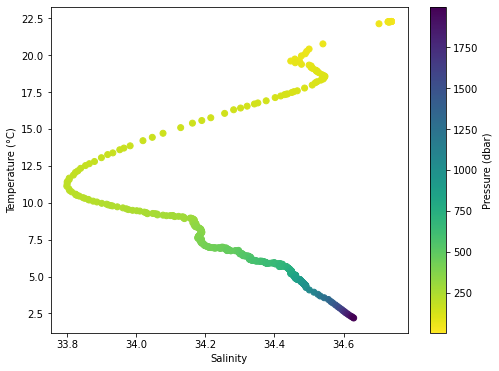

In [11]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

We used the default python colorbar for this plot (viridis), but there is a much larger [colormap collection](https://matplotlib.org/users/colormaps.html) available.

With a little bit more code, we can add lines of constant density.  This was adapted from the [Ocean Python T-S Diagram](https://oceanpython.org/2013/02/17/t-s-diagram/) example, but we will use meshgrid instead, since it makes the code a bit simpler.


To calculate density, we will need the wonderful [seawater](https://pythonhosted.org/seawater/index.html) library.

In [12]:
!pip install seawater
import seawater
import numpy as np

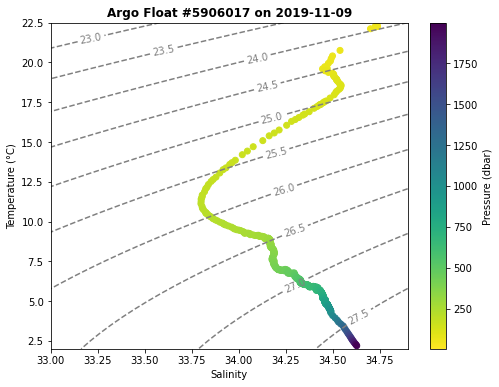

In [13]:
# TS Diagram with density contours
plt.figure(figsize=(8,6))

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.title('Argo Float #%d on %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');

## Float Track Map

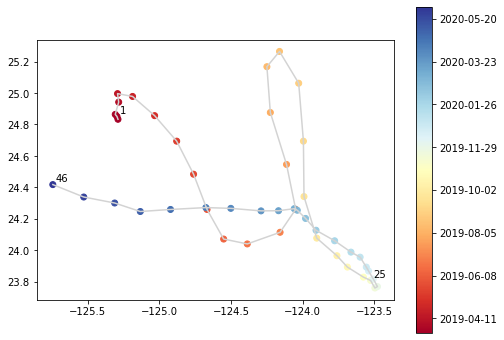

In [14]:
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu')

# Crude profile labels
for jj in [1,25,-1]:
  plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

## Fancier Maps with Cartopy
The cartopy library provides a lot of great features to create your own custom maps, though it takes a lot of patience to get it to work correctly.

In [15]:
# Install Cartopy in Google Colab
!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

Uninstalling Shapely-1.7.0:
  Successfully uninstalled Shapely-1.7.0
  Using cached https://files.pythonhosted.org/packages/44/ec/4eddbf9d17a917c51fb4ad159aa7137f506681e91ab559cf87d120e1d78d/Shapely-1.7.0.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [0]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature

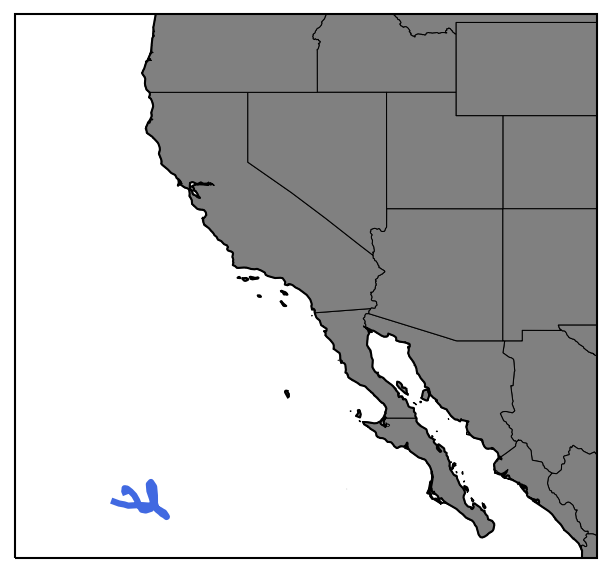

In [17]:
fig = plt.figure(figsize=(6.4,4.8),dpi=150)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -105, 22, 45])

# Basemaps
states = NaturalEarthFeature(category="cultural", scale="10m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black",facecolor='grey')
ax.coastlines('50m', linewidth=1)

ax.plot(data.longitude, data.latitude, linewidth=3, color='royalblue');


For another example, check out this [notebook](https://github.com/ooi-data-lab/data-lab-workshops/blob/master/March2019/Activities/DL_March_Anoxia_v4.ipynb) which plots a glider track, colored by date, along with lat/lon labels and station locations.